# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_curve
from sklearn.metrics import classification_report
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Import dataset

In [2]:
master_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df=master_df # Keep master copy in case original data is required later

# Check datatype, Summary, shape, Null values

In [3]:
df.info()                 # Info about dataframe, columns, data types, Null values 
df.shape                  # Shape of data frame 
df.head()                 # First five rows
df.nunique()              # Number of unique values in each column
df.describe().transpose() # As we see there are some -ve value for experience, we need to explore more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(5000, 14)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [4]:
df[df['Experience'] < 0]                                       # Show rows with -ve experience
df.Experience = np.where(df.Experience < 0, 0,df.Experience)   # Replace -ve expereince with zero

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [5]:
df.isnull().sum() # Though we checked above there are no Null values, check again after converting -ve experience to zero

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# EDA - Check unique values for all columns

In [6]:
df['ID'].unique()

array([   1,    2,    3, ..., 4998, 4999, 5000], dtype=int64)

In [7]:
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [8]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22,  0, 34, 38, 40, 33,  4, 42, 43], dtype=int64)

In [9]:
df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [10]:
df['ZIP Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [11]:
df['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

In [12]:
df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [13]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [14]:
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [15]:
df['Personal Loan'].unique()

array([0, 1], dtype=int64)

In [16]:
df['Securities Account'].unique()

array([1, 0], dtype=int64)

In [17]:
df['CD Account'].unique()

array([0, 1], dtype=int64)

In [18]:
df['Online'].unique()

array([0, 1], dtype=int64)

In [19]:
df['CreditCard'].unique()

array([0, 1], dtype=int64)

# EDA

In [20]:
# People with zero or no mortgage
df[df['Mortgage'] == 0]   # There are 3462 people with zero mortgage

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,64,40,75,94588,3,2.0,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [21]:
# People with zero Credit Card Spending
df[df['CCAvg'] == 0]   # There are 106 people with zero average CC spending

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,64,42,17,32,94523,4,0.0,2,0,0,0,0,1,0
128,129,38,14,74,92182,2,0.0,1,0,0,1,0,1,0
198,199,27,3,59,94123,4,0.0,1,90,0,1,0,1,0
210,211,51,26,20,92131,2,0.0,1,0,0,0,0,0,0
215,216,38,14,92,95818,2,0.0,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,4802,34,10,88,94404,2,0.0,1,121,0,0,0,1,0
4826,4827,56,31,81,93943,2,0.0,3,225,0,0,0,0,0
4837,4838,36,10,183,95348,2,0.0,1,0,0,0,0,0,0
4910,4911,48,22,120,90291,1,0.0,1,0,0,0,0,1,0


In [22]:
df['Family'].value_counts(normalize=True).sort_index() 

1    0.2944
2    0.2592
3    0.2020
4    0.2444
Name: Family, dtype: float64

In [23]:
df['Education'].value_counts(normalize=True).sort_index() # Around 58% are graduate or higher (30% are Professional)

1    0.4192
2    0.2806
3    0.3002
Name: Education, dtype: float64

In [24]:
df['Securities Account'].value_counts(normalize=True).sort_index() # Only 10% have securities account

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [25]:
df['CD Account'].value_counts(normalize=True).sort_index() # Only 6% have CD Account

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [26]:
df['Online'].value_counts(normalize=True).sort_index() # Around 60% have Online account

0    0.4032
1    0.5968
Name: Online, dtype: float64

In [27]:
df['CreditCard'].value_counts(normalize=True).sort_index() # Around 30% have CC Account

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [28]:
df['Personal Loan'].value_counts(normalize=True).sort_index() # Around 10% have personal loans

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

# Analysis Outcome

* There are 3462 people with zero mortgage
* There are 106 people with zero Average CC spending
--------------------------------------
* 42% people are Undergrads
* 28% people are Grads
* 30% people are Professionals
--------------------------------------
* 90% people don't have securities acocunt
* 94% people don't have CD account
* 60% people have Online account
* 70% people don't have credit card
* 90% people did not accepted personal loan in last campaign
--------------------------------------


<Figure size 1440x360 with 0 Axes>

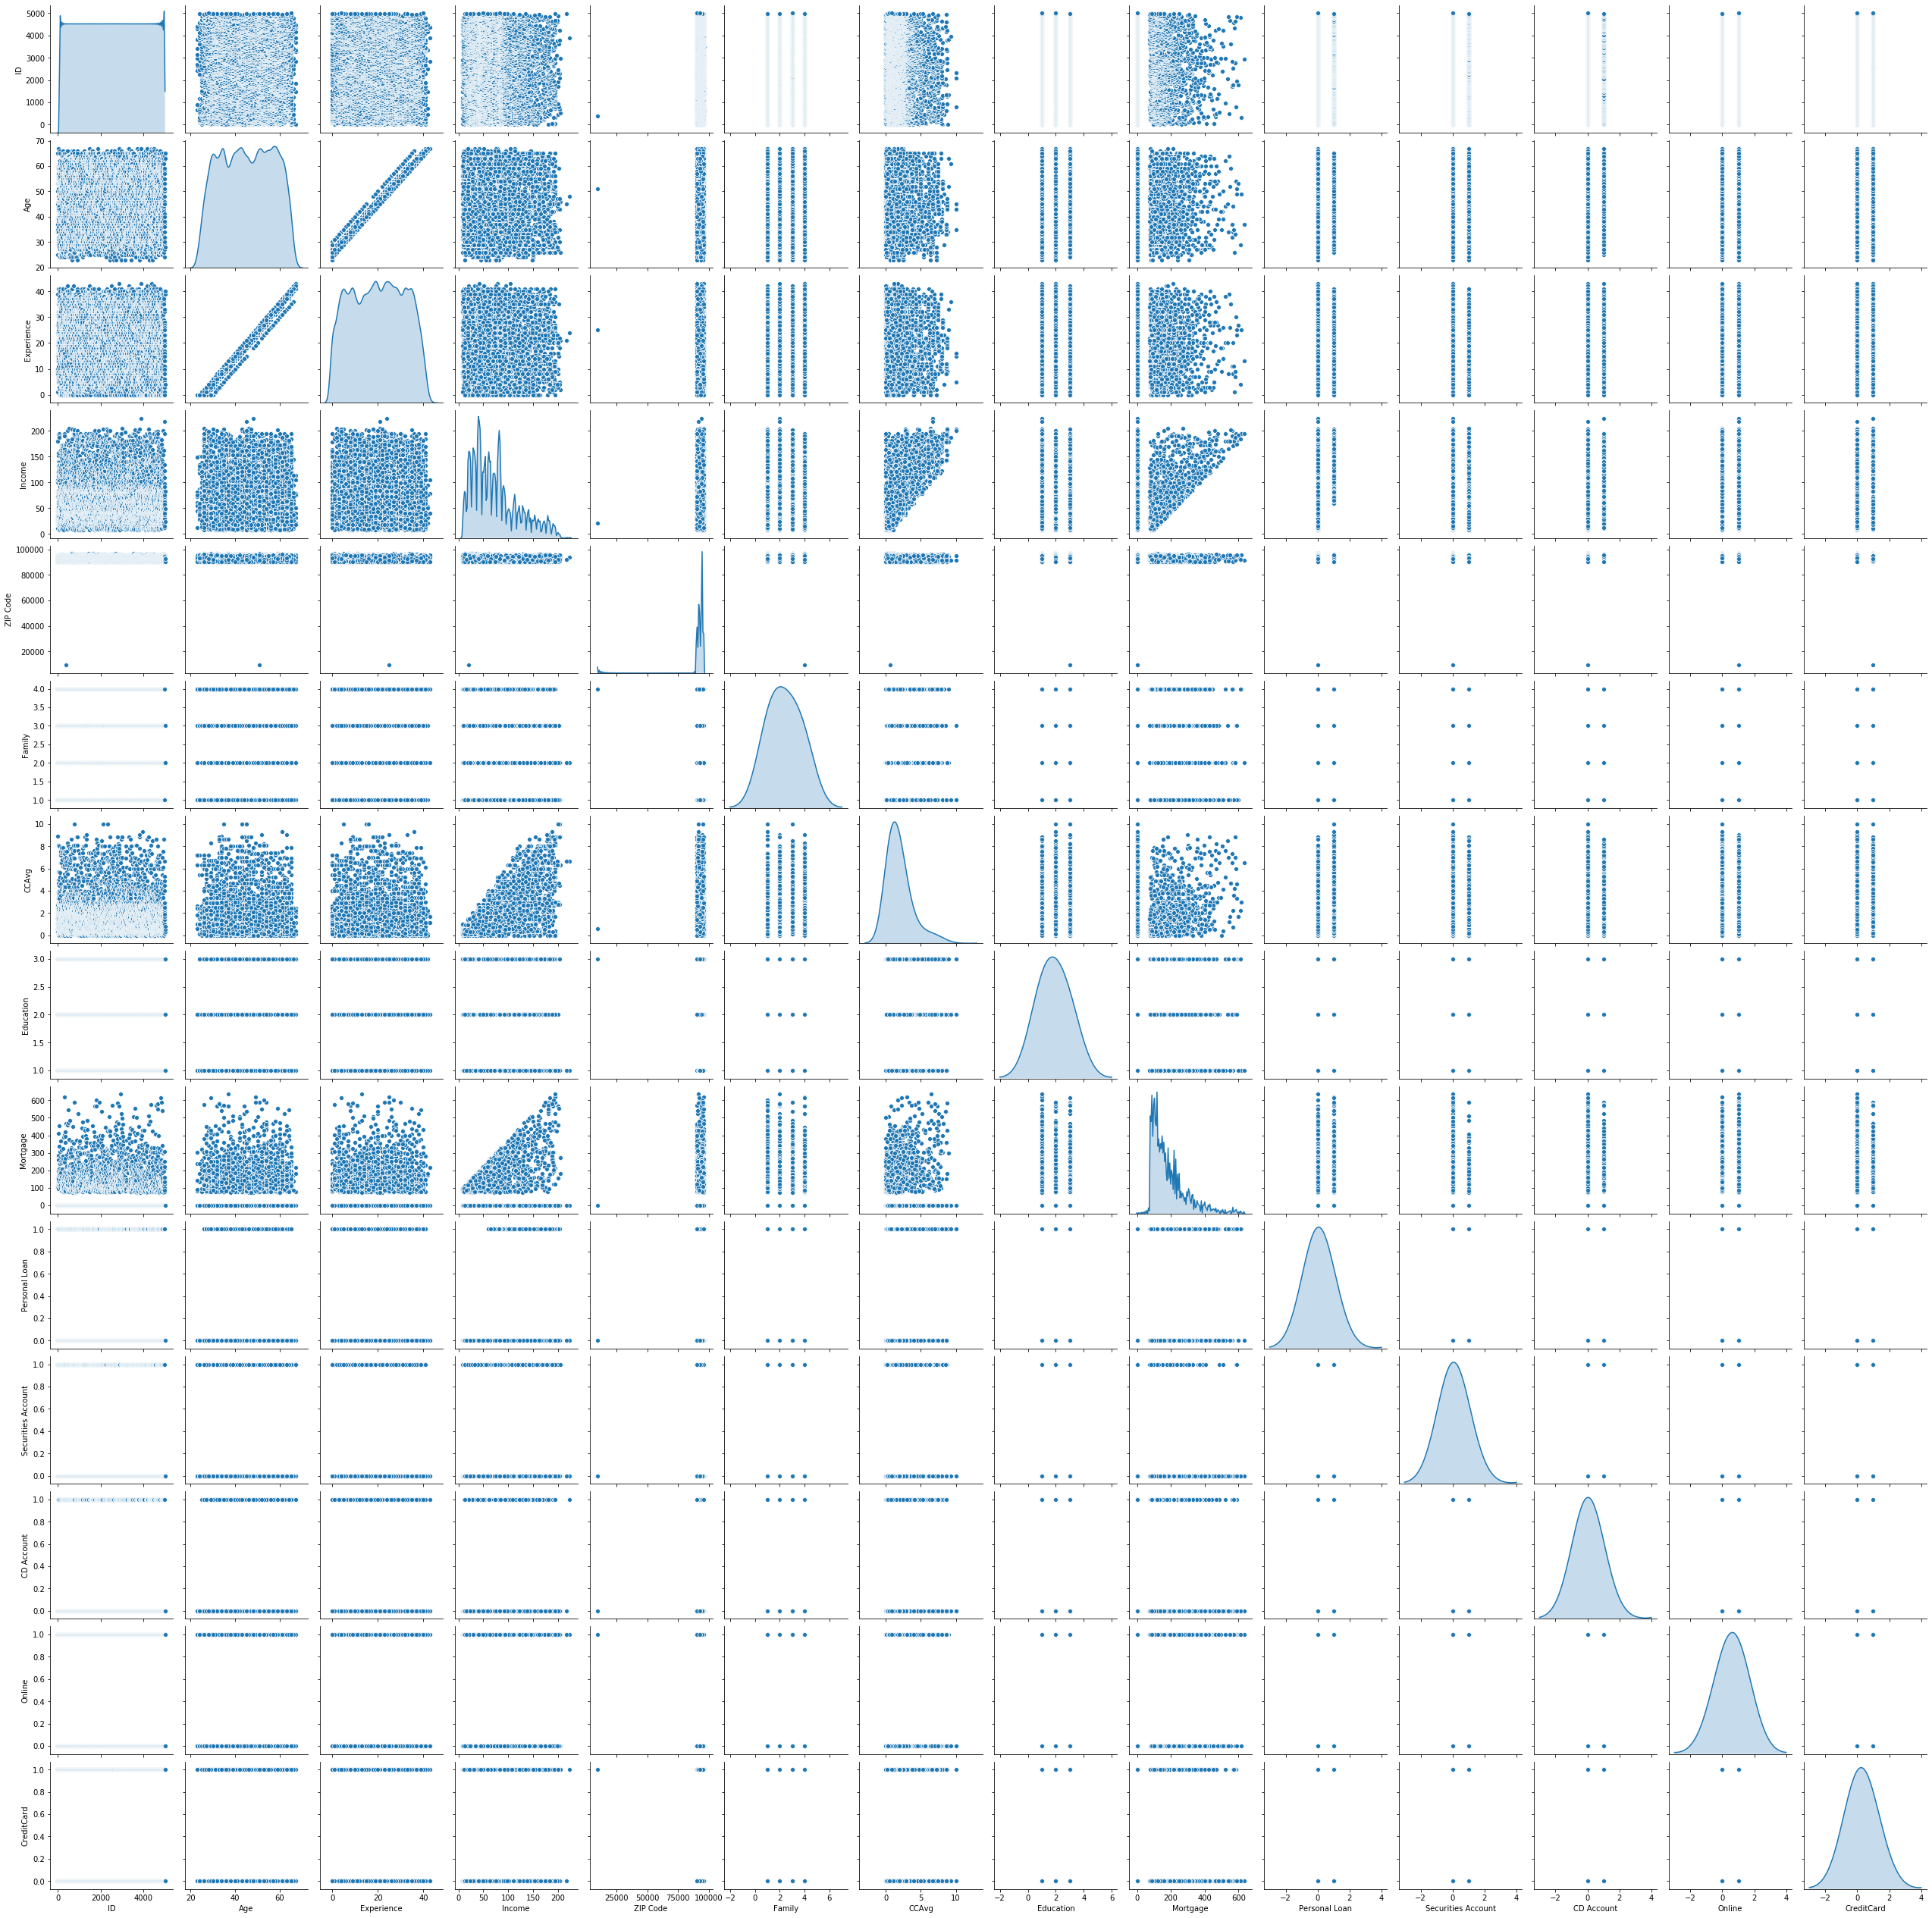

In [29]:
plt.figure(figsize=(20,5))
sns.pairplot(df, diag_kind='kde', diag_kws={'bw':'1.0'})
plt.show();

In [30]:
df['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

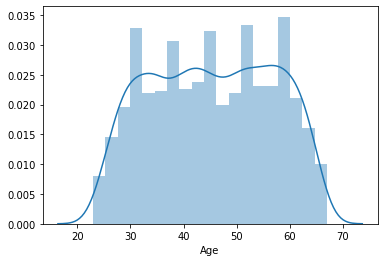

In [31]:
sns.distplot(df['Age']);

* Mean age is 45 and standard deviation is 11.5
* Most of the people are between 35 and 55 

In [32]:
df['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

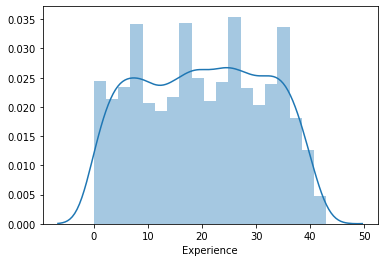

In [33]:
sns.distplot(df['Experience']);

In [34]:
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

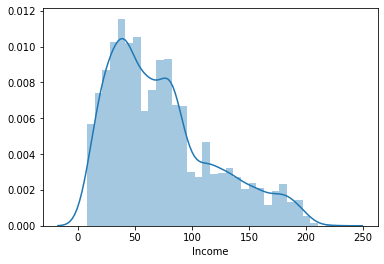

In [35]:
sns.distplot(df['Income']);

* Mean annual income is 73.77
* Std Deviation is 46
* Data is slightly right skewed

In [36]:
df['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

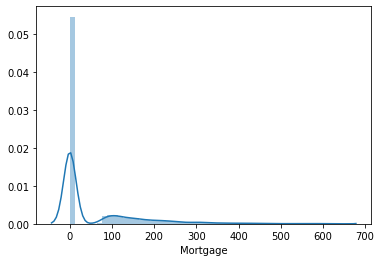

In [37]:
sns.distplot(df['Mortgage']);

* Mean mortgage is 56.5 
* Standard deviation is 101.71
* Data is highly skewed

In [38]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


* There is a high correaltion between Age and Experience
* ID and Zip code are just numbers, hence can be dropped

In [39]:
df.drop('ID', axis=1, inplace=True)
df.drop('ZIP Code', axis=1, inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


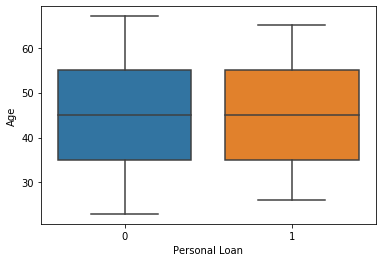

In [40]:
sns.boxplot(x='Personal Loan',y='Age',data=df);

* Age does not seems to be impacting the decision for loan

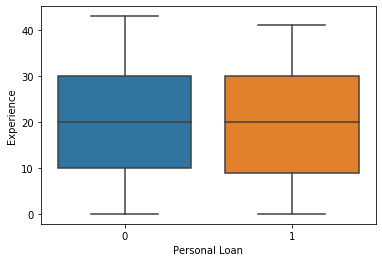

In [41]:
sns.boxplot(x='Personal Loan',y='Experience',data=df);

* Expereince does not seems to be impacting decison and it is also highly correlated with Age

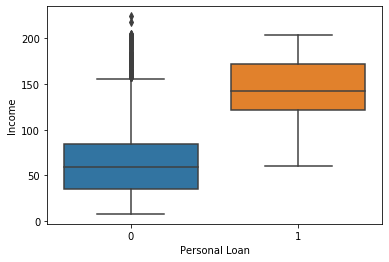

In [42]:
sns.boxplot(x='Personal Loan',y='Income',data=df);

* People with higher income seems to be the ones to have personal loan

In [43]:
df.drop('Experience', axis=1, inplace=True)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


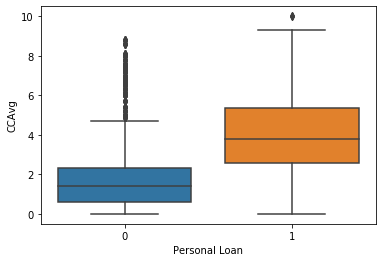

In [44]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=df);

* People who have more avaergae CC spending seems to get personal loans

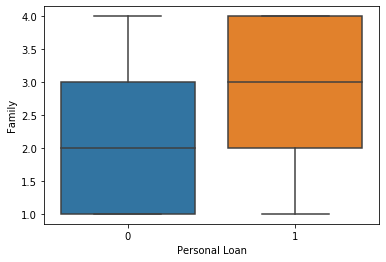

In [45]:
sns.boxplot(x='Personal Loan',y='Family',data=df);

* People with more family members have slightly higher chances of going for personal loan

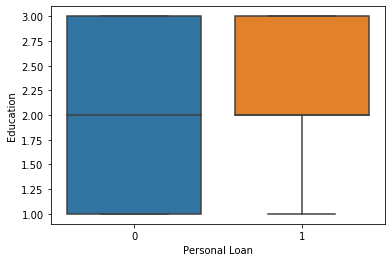

In [46]:
sns.boxplot(x='Personal Loan',y='Education',data=df);

* People with higher education (Grads or above) have higher chances of getting personal loans

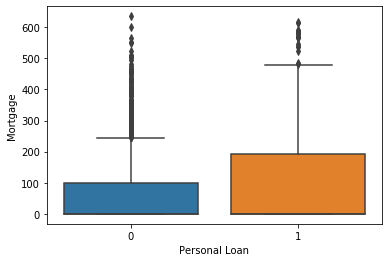

In [47]:
sns.boxplot(x='Personal Loan',y='Mortgage',data=df);

* We can see there are large number of outliers
* As the total count of records is only 5000, we will keep the outliers

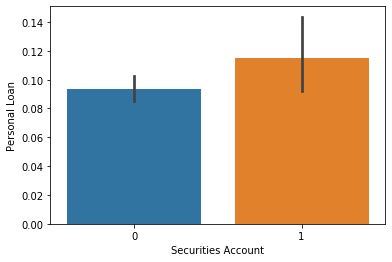

In [48]:
sns.barplot(df['Securities Account'], df['Personal Loan']);

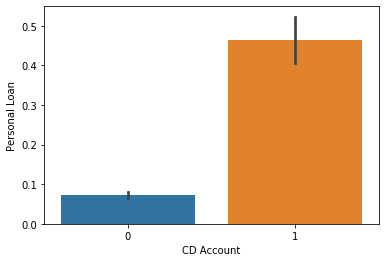

In [49]:
sns.barplot(df['CD Account'], df['Personal Loan']);

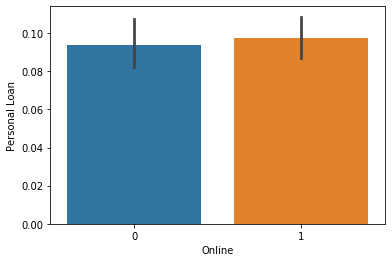

In [50]:
sns.barplot(df['Online'], df['Personal Loan']);

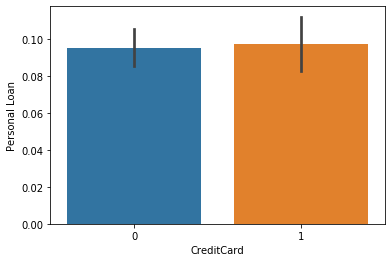

In [51]:
sns.barplot(df['CreditCard'], df['Personal Loan']);

* People with CD account seems to have personal loans
* Credit Card Account, Online Account (people who is internet banking), Securities Account doesn't seem to impact personal loan decision

# Build model

In [52]:
df=pd.get_dummies(df, columns=['Education'],drop_first=True)
x=df.drop('Personal Loan',axis=1) # Independent variables
y=df['Personal Loan']             # Dependent variable

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)   # Split data in 70:30 ratio

In [54]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)                     # Fit training dataset

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_predict = logreg.predict(x_test)             # Get predicted

In [56]:
# Following code logic is as provided during the class on 4th Jul
print("Training accuracy is",logreg.score(x_train,y_train))  
print("Testing accuracy is",logreg.score(x_test, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
print("Accuracy Score:",accuracy_score(y_test,y_predict))
print()
print(classification_report(y_test, y_predict))

Training accuracy is 0.9568571428571429
Testing accuracy is 0.952
Confusion Matrix
[[1339   12]
 [  60   89]]

Recall: 0.5973154362416108
Precision: 0.8811881188118812
F1 Score: 0.712
Roc Auc Score: 0.7942165634205833
Accuracy Score: 0.952

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.88      0.60      0.71       149

    accuracy                           0.95      1500
   macro avg       0.92      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



* We see that training accuracy of the model is ~95%
* We see that testing accuracy is slightly lower but still ~95%
* From testing dataframe, there are 89 True Positives and 60 False Negatives
* ROC AUC is 79%

# Make model perform better

In [57]:
# Check Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [58]:
# Change multiple params like penalty, solver, class weight and C, running loops to get best values for final model
train_score=[]
test_score=[]
rcscore=[]
precscore=[]
f1score=[]
rocaucscore=[]
penalty = ['l1','l2','none']
for i in penalty:
    if i == "l1":
        solver = ['liblinear','saga']
    elif i == "l2":
        solver = ['newton-cg','lbfgs','liblinear','sag','saga']
    elif i == "none":
        solver = ['newton-cg','lbfgs','sag','saga']
    else:
        solver = ['saga']
    for j in solver:
        weight = ['','balanced']
        for k in weight:
            C = [0.01,0.1,0.25,0.5,0.75,1]
            for l in C:
                model = LogisticRegression(random_state=42,penalty=i, C = l, solver=j, class_weight=k)  # changing values of params
                model.fit(x_train, y_train) 
                y_predict = model.predict(x_test)
                train_score.append(round(model.score(x_train, y_train),3))
                test_score.append(round(model.score(x_test, y_test),3))
                rcscore.append(round(recall_score(y_test,y_predict),3))
                precscore.append(round(precision_score(y_test,y_predict),3))
                f1score.append(round(f1_score(y_test,y_predict),3))
                rocaucscore.append(round(roc_auc_score(y_test,y_predict),3))
            print('Penalty is:',i,', solver is: ',j,' Class weight is:',k)
            print('C is:', C)
            print('Train Score is:',train_score)
            print('Test Score is:',test_score)
            print('Recall Score is:',rcscore)
            print('Precision Score is:',precscore)
            print('F1 Score is:',f1score)
            print('RoC Auc Score is:',rocaucscore)
            print('-------------------------------------')
            train_score=[]
            test_score=[]
            rcscore=[]
            precscore=[]
            f1score=[]
            rocaucscore=[]

LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l1 , solver is:  liblinear  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.895, 0.951, 0.955, 0.957, 0.957, 0.958]
Test Score is: [0.891, 0.944, 0.955, 0.955, 0.957, 0.957]
Recall Score is: [0.154, 0.523, 0.611, 0.617, 0.631, 0.631]
Precision Score is: [0.377, 0.857, 0.91, 0.902, 0.904, 0.904]
F1 Score is: [0.219, 0.65, 0.731, 0.733, 0.743, 0.743]
RoC Auc Score is: [0.563, 0.757, 0.802, 0.805, 0.812, 0.812]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l1 , solver is:  liblinear  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.811, 0.905, 0.909, 0.909, 0.909, 0.909]
Test Score is: [0.788, 0.902, 0.905, 0.909, 0.906, 0.906]
Recall Score is: [0.826, 0.859, 0.859, 0.859, 0.859, 0.859]
Precision Score is: [0.296, 0.504, 0.514, 0.527, 0.516, 0.516]
F1 Score is: [0.436, 0.635, 0.643, 0.653, 0.645, 0.645]
RoC Auc Score is: [0.805, 0.883, 0.885, 0.887, 0.885, 0.885]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l1 , solver is:  saga  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.895, 0.897, 0.897, 0.897, 0.897, 0.897]
Test Score is: [0.891, 0.89, 0.89, 0.89, 0.89, 0.89]
Recall Score is: [0.154, 0.148, 0.148, 0.148, 0.148, 0.148]
Precision Score is: [0.377, 0.367, 0.367, 0.367, 0.367, 0.367]
F1 Score is: [0.219, 0.211, 0.211, 0.211, 0.211, 0.211]
RoC Auc Score is: [0.563, 0.56, 0.56, 0.56, 0.56, 0.56]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l1 , solver is:  saga  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.801, 0.803, 0.803, 0.804, 0.804, 0.804]
Test Score is: [0.781, 0.783, 0.784, 0.784, 0.784, 0.784]
Recall Score is: [0.826, 0.826, 0.826, 0.826, 0.826, 0.826]
Precision Score is: [0.289, 0.291, 0.292, 0.292, 0.292, 0.292]
F1 Score is: [0.428, 0.431, 0.432, 0.432, 0.432, 0.432]
RoC Auc Score is: [0.801, 0.802, 0.802, 0.802, 0.802, 0.802]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  newton-cg  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.93, 0.95, 0.952, 0.956, 0.957, 0.957]
Test Score is: [0.923, 0.945, 0.952, 0.955, 0.959, 0.958]
Recall Score is: [0.403, 0.517, 0.584, 0.611, 0.644, 0.644]
Precision Score is: [0.69, 0.875, 0.897, 0.91, 0.914, 0.906]
F1 Score is: [0.508, 0.65, 0.707, 0.731, 0.756, 0.753]
RoC Auc Score is: [0.691, 0.754, 0.788, 0.802, 0.819, 0.818]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  newton-cg  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.888, 0.905, 0.906, 0.909, 0.909, 0.909]
Test Score is: [0.874, 0.9, 0.904, 0.909, 0.911, 0.91]
Recall Score is: [0.826, 0.859, 0.859, 0.866, 0.866, 0.866]
Precision Score is: [0.43, 0.498, 0.51, 0.524, 0.531, 0.529]
F1 Score is: [0.566, 0.631, 0.64, 0.653, 0.658, 0.656]
RoC Auc Score is: [0.852, 0.882, 0.884, 0.89, 0.891, 0.89]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  lbfgs  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.93, 0.945, 0.949, 0.951, 0.952, 0.957]
Test Score is: [0.923, 0.941, 0.947, 0.951, 0.951, 0.952]
Recall Score is: [0.403, 0.51, 0.557, 0.611, 0.624, 0.597]
Precision Score is: [0.69, 0.826, 0.856, 0.85, 0.845, 0.881]
F1 Score is: [0.508, 0.631, 0.675, 0.711, 0.718, 0.712]
RoC Auc Score is: [0.691, 0.749, 0.773, 0.799, 0.806, 0.794]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  lbfgs  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.891, 0.905, 0.905, 0.903, 0.903, 0.905]
Test Score is: [0.878, 0.897, 0.895, 0.901, 0.901, 0.903]
Recall Score is: [0.819, 0.859, 0.852, 0.852, 0.852, 0.859]
Precision Score is: [0.439, 0.49, 0.485, 0.502, 0.5, 0.506]
F1 Score is: [0.571, 0.624, 0.618, 0.632, 0.63, 0.637]
RoC Auc Score is: [0.852, 0.88, 0.876, 0.88, 0.879, 0.883]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  liblinear  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.909, 0.938, 0.949, 0.952, 0.953, 0.954]
Test Score is: [0.896, 0.929, 0.941, 0.947, 0.95, 0.951]
Recall Score is: [0.181, 0.396, 0.497, 0.537, 0.564, 0.57]
Precision Score is: [0.443, 0.787, 0.851, 0.879, 0.894, 0.895]
F1 Score is: [0.257, 0.527, 0.627, 0.667, 0.691, 0.697]
RoC Auc Score is: [0.578, 0.692, 0.744, 0.764, 0.778, 0.782]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  liblinear  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.837, 0.891, 0.903, 0.907, 0.907, 0.907]
Test Score is: [0.818, 0.877, 0.893, 0.897, 0.9, 0.901]
Recall Score is: [0.805, 0.846, 0.852, 0.852, 0.852, 0.852]
Precision Score is: [0.33, 0.439, 0.479, 0.488, 0.498, 0.5]
F1 Score is: [0.468, 0.578, 0.614, 0.621, 0.629, 0.63]
RoC Auc Score is: [0.812, 0.863, 0.875, 0.877, 0.879, 0.879]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  sag  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.898, 0.898, 0.898, 0.898, 0.898, 0.898]
Test Score is: [0.891, 0.89, 0.89, 0.89, 0.89, 0.89]
Recall Score is: [0.148, 0.148, 0.148, 0.148, 0.148, 0.148]
Precision Score is: [0.373, 0.367, 0.367, 0.367, 0.367, 0.367]
F1 Score is: [0.212, 0.211, 0.211, 0.211, 0.211, 0.211]
RoC Auc Score is: [0.56, 0.56, 0.56, 0.56, 0.56, 0.56]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  sag  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.808, 0.808, 0.808, 0.808, 0.808, 0.808]
Test Score is: [0.785, 0.784, 0.784, 0.784, 0.784, 0.784]
Recall Score is: [0.805, 0.792, 0.792, 0.792, 0.792, 0.792]
Precision Score is: [0.291, 0.287, 0.287, 0.287, 0.287, 0.287]
F1 Score is: [0.427, 0.421, 0.421, 0.421, 0.421, 0.421]
RoC Auc Score is: [0.794, 0.788, 0.788, 0.788, 0.788, 0.788]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  saga  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.897, 0.897, 0.897, 0.897, 0.897, 0.897]
Test Score is: [0.89, 0.89, 0.89, 0.89, 0.89, 0.89]
Recall Score is: [0.148, 0.148, 0.148, 0.148, 0.148, 0.148]
Precision Score is: [0.367, 0.367, 0.367, 0.367, 0.367, 0.367]
F1 Score is: [0.211, 0.211, 0.211, 0.211, 0.211, 0.211]
RoC Auc Score is: [0.56, 0.56, 0.56, 0.56, 0.56, 0.56]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: l2 , solver is:  saga  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.804, 0.804, 0.804, 0.804, 0.804, 0.804]
Test Score is: [0.784, 0.784, 0.784, 0.784, 0.784, 0.784]
Recall Score is: [0.826, 0.826, 0.826, 0.826, 0.826, 0.826]
Precision Score is: [0.292, 0.292, 0.292, 0.292, 0.292, 0.292]
F1 Score is: [0.432, 0.432, 0.432, 0.432, 0.432, 0.432]
RoC Auc Score is: [0.802, 0.802, 0.802, 0.802, 0.802, 0.802]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: none , solver is:  newton-cg  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.957, 0.957, 0.957, 0.957, 0.957, 0.957]
Test Score is: [0.958, 0.958, 0.958, 0.958, 0.958, 0.958]
Recall Score is: [0.658, 0.658, 0.658, 0.658, 0.658, 0.658]
Precision Score is: [0.891, 0.891, 0.891, 0.891, 0.891, 0.891]
F1 Score is: [0.757, 0.757, 0.757, 0.757, 0.757, 0.757]
RoC Auc Score is: [0.824, 0.824, 0.824, 0.824, 0.824, 0.824]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: none , solver is:  newton-cg  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.909, 0.909, 0.909, 0.909, 0.909, 0.909]
Test Score is: [0.907, 0.907, 0.907, 0.907, 0.907, 0.907]
Recall Score is: [0.866, 0.866, 0.866, 0.866, 0.866, 0.866]
Precision Score is: [0.52, 0.52, 0.52, 0.52, 0.52, 0.52]
F1 Score is: [0.65, 0.65, 0.65, 0.65, 0.65, 0.65]
RoC Auc Score is: [0.889, 0.889, 0.889, 0.889, 0.889, 0.889]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: none , solver is:  lbfgs  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.953, 0.953, 0.953, 0.953, 0.953, 0.953]
Test Score is: [0.95, 0.95, 0.95, 0.95, 0.95, 0.95]
Recall Score is: [0.624, 0.624, 0.624, 0.624, 0.624, 0.624]
Precision Score is: [0.83, 0.83, 0.83, 0.83, 0.83, 0.83]
F1 Score is: [0.713, 0.713, 0.713, 0.713, 0.713, 0.713]
RoC Auc Score is: [0.805, 0.805, 0.805, 0.805, 0.805, 0.805]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: none , solver is:  lbfgs  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.906, 0.906, 0.906, 0.906, 0.906, 0.906]
Test Score is: [0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
Recall Score is: [0.866, 0.866, 0.866, 0.866, 0.866, 0.866]
Precision Score is: [0.498, 0.498, 0.498, 0.498, 0.498, 0.498]
F1 Score is: [0.632, 0.632, 0.632, 0.632, 0.632, 0.632]
RoC Auc Score is: [0.885, 0.885, 0.885, 0.885, 0.885, 0.885]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: none , solver is:  sag  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.898, 0.898, 0.898, 0.898, 0.898, 0.898]
Test Score is: [0.89, 0.89, 0.89, 0.89, 0.89, 0.89]
Recall Score is: [0.148, 0.148, 0.148, 0.148, 0.148, 0.148]
Precision Score is: [0.367, 0.367, 0.367, 0.367, 0.367, 0.367]
F1 Score is: [0.211, 0.211, 0.211, 0.211, 0.211, 0.211]
RoC Auc Score is: [0.56, 0.56, 0.56, 0.56, 0.56, 0.56]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: none , solver is:  sag  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.808, 0.808, 0.808, 0.808, 0.808, 0.808]
Test Score is: [0.784, 0.784, 0.784, 0.784, 0.784, 0.784]
Recall Score is: [0.792, 0.792, 0.792, 0.792, 0.792, 0.792]
Precision Score is: [0.287, 0.287, 0.287, 0.287, 0.287, 0.287]
F1 Score is: [0.421, 0.421, 0.421, 0.421, 0.421, 0.421]
RoC Auc Score is: [0.788, 0.788, 0.788, 0.788, 0.788, 0.788]
-------------------------------------


LogisticRegression(C=0.01, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight='', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: none , solver is:  saga  Class weight is: 
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.897, 0.897, 0.897, 0.897, 0.897, 0.897]
Test Score is: [0.89, 0.89, 0.89, 0.89, 0.89, 0.89]
Recall Score is: [0.148, 0.148, 0.148, 0.148, 0.148, 0.148]
Precision Score is: [0.367, 0.367, 0.367, 0.367, 0.367, 0.367]
F1 Score is: [0.211, 0.211, 0.211, 0.211, 0.211, 0.211]
RoC Auc Score is: [0.56, 0.56, 0.56, 0.56, 0.56, 0.56]
-------------------------------------


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=42, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Penalty is: none , solver is:  saga  Class weight is: balanced
C is: [0.01, 0.1, 0.25, 0.5, 0.75, 1]
Train Score is: [0.804, 0.804, 0.804, 0.804, 0.804, 0.804]
Test Score is: [0.784, 0.784, 0.784, 0.784, 0.784, 0.784]
Recall Score is: [0.826, 0.826, 0.826, 0.826, 0.826, 0.826]
Precision Score is: [0.292, 0.292, 0.292, 0.292, 0.292, 0.292]
F1 Score is: [0.432, 0.432, 0.432, 0.432, 0.432, 0.432]
RoC Auc Score is: [0.802, 0.802, 0.802, 0.802, 0.802, 0.802]
-------------------------------------


In [59]:
# Hence the final model based outcome from above is

model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=0.75, class_weight='balanced') 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Training accuracy",round(model.score(x_train,y_train),3))  
print("Testing accuracy",round(model.score(x_test, y_test),3))
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
print("Accuracy Score:",accuracy_score(y_test,y_predict))
print()
print(classification_report(y_test, y_predict))

LogisticRegression(C=0.75, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Training accuracy 0.909
Testing accuracy 0.911
Confusion Matrix
[[1237  114]
 [  20  129]]

Recall: 0.8657718120805369
Precision: 0.5308641975308642
F1 Score: 0.6581632653061225
Roc Auc Score: 0.8906949363881589
Accuracy Score: 0.9106666666666666

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1351
           1       0.53      0.87      0.66       149

    accuracy                           0.91      1500
   macro avg       0.76      0.89      0.80      1500
weighted avg       0.94      0.91      0.92      1500



# Conclusion

The testing accuracy of final model is 91 which is better than training accuracy of 90

As the objective is to have better prediction on likelihood of customer buying personal loan, accuracy doesn't semes to be the only measure and we should focus on improving Recall score and reducing False Negatives (Type II errors).

We should focus on "False Negatives" i.e. those customers who were not predicted to buy personal loan but end up buying personal loan.

We were able to get a better model after changing paramaters.
* The testing accuracy is 91 as compared to 90 training accuracy score
* The Recall score of 86

As compared to original model
* The Roc Auc score increased from 79 to 89
* Recall score increased from 59.7 to 86.5
* The False Negatives decreased from 60 to 20
Overall we were able to get a better model after changing params though values of Precision and F1 Score decreased.

In our final model we see from confusion matrix we were able to reduce False Negatives from 60 to 20 (Type II error)

Confusion Matrix prior to changing params
* True Negatives - 1339
* False Positives - 12 (Type I errors)
* False Negatives - 60 (Type II errors)
* True Positives - 89

Confusion Matrix after changing params
* True Negatives - 1237
* False Positives - 114 (Type I errors)
* False Negatives - 20 (Type II errors)
* True Positives - 129

Hence, we conclude that we are able to make the model perform better and are able to reduce Type II errors which may result in better prediction of customers buying personal loans.